# Customer Analytics Customer Behavior

The importance of customer analytics is rising: because access to customer data became easier
for many businesses, and also customers now have easier access to data and information on similar
products and contents provided by other competitors, it is critical to many businesses to be
able to understand and predict what their customers are likely to purchase or view. The deeper
the understanding your company has about its customers, the better competitive power it will
have against its competitors.

The data set utilized for this analysis is one of the publicly available datasets from IBM at the following
link: 

https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data/downloads/ibm-watson-marketing-customer-value-data.zip/1

### 1. Load Data

In [1]:
# import required packages
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('./Data/Watson_Customer_Data.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Analytics on Engaged Customers
We are going to analyze it to understand how different customers behave and react to different
marketing strategies.

#### 2.1 - Overall Engagement Rate

The Response field contains information about whether a customer responded to the marketing
efforts.

In [5]:
#Get the total number of customers who have responded
num_cust_resonse_yes = len(df[df['Response'] == 'Yes'])
num_cust_resonse_no = len(df[df['Response'] == 'No'])

print("Number of Customers Resonding to Marketing Efforts: ", num_cust_resonse_yes)
print("Number of Customers Non-Responsive to Marketing Efforts: ", num_cust_resonse_no)

#Can also be done with the groupby method
df.groupby('Response').count()['Customer']

Number of Customers Resonding to Marketing Efforts:  1308
Number of Customers Non-Responsive to Marketing Efforts:  7826


Response
No     7826
Yes    1308
Name: Customer, dtype: int64

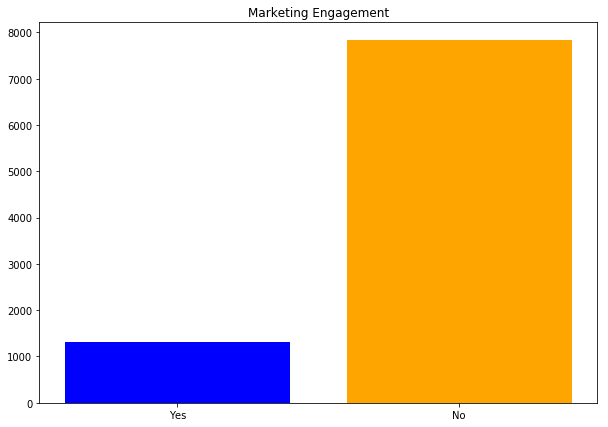

In [6]:
# Visualize this in a bar plot

fig, ax = plt.subplots(figsize=(10,7))
ax.bar('Yes',num_cust_resonse_yes, color='blue')
ax.bar('No', num_cust_resonse_no, color='orange' )
ax.set_title('Marketing Engagement')
plt.show()

#Condensed coding form
#ax = df.groupby('Response').count()['Customer'].plot(kind='bar', color='blue', grid=False, figsize=(10,7), title='Marketing Engagement')

In [7]:
# Calculate the percentages of the engaged and non-engaged customers
df.groupby('Response').count()['Customer'] / df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

From this output and from the plot, we can see that only about `14%` of the customers responded
to the marketing calls.